--- 
**Intro**

Statistical Learning is conducted to explore and understand data through a variety of tools. These tools may be supervised or unsupervised in nature.

Stats learning has gone by many names over the course of its history. Early application date all the way back to the early 1800s when regression was used to predict the orbit of planets. Up until the 1970's most of the methods were linear, non-linear methods were too computationally intensive so the advent of computing helped us scale and apply more effective algorithms. Not to mention the commoditizaiton of computing resources and stats learning packages. 

*!pip install ISLP* run this in terminal to have access to the ISLP datasets

* What is statistical Learning? 
    * Is all about exploring the function *f* which describes a relationship between the input variables and outcome variables. 
* Why Predict *f*? 
    * Conducting prediction. If we have many Xs and want to predict Y. For example we have patient labs and want to predict likelihood of having a rare disease. No matter how well we try to predict *f*, there will always be a component of irreducible error or error which we cannot get rid of perhaps becuase the is information out there leading to our f value or even random noise which we cannot capture. As such the upper bound in terms or irreducible error and its impact on our predictions isnt known. 
    * Conducting inference. We want to explore the relationship between X and Y. Which predictors are associated with the response? How much does in increase in advertising budget lead to increased sales?
* Parametric vs non Parametric: Parametric assume the form of the function. We are assuming our outcome variable is modelled by the input variable which we train on, the the function is limited into the shape its given. Non parametric approaches dont follow an assumed form and therefor are more flexible. 

---
**Assessing Model Accuracy & Best Fit**

The MSE formula is $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

This MSE eval metric is used to judge regression methods and represents the difference between our predicted values and our true values. Squaring the different highlights larger errors (worse predictions). When experimenting with different models, we would pick the model or statistical learning method with the lowest average MSE across the test dataset. 

**Bias & Variance Tradeoff**
* Bias is a type of error that results from our model being too simple, not complex enough to capture the relationships or patterns within our datasets. 
    * $\text{Bias}[\hat{f}(x)] = E[\hat{f}(x)] - f(x)$
    * difference between avg pred or expected value and the true value. Bias occurs as we try to model real world phenomena using models which assume a form.
* Variance is the flipside. It is the error alikened to overfitting when we introduce too much model complexity that the model generalizes poorly to unseen data. 
    * $\text{Var}[\hat{f}(x)] = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$
    * Avg of all differences between the pred and true values squared. 
* Tradeoff is the while we can seek to minimize both, optimizing for one will push the other up. 
* Total Error   
    * $E[(y - \hat{f}(x))^2] = \text{Bias}^2[\hat{f}(x)] + \text{Var}[\hat{f}(x)] + \sigma^2$
    These components represent the error of our statistical learning method, including the irreducible error (variance of the error term)


**Assessing Classification Models**
* The error rate is used here to judge the learning method. 
    * $\text{Error Rate} = \frac{1}{n} \sum_{i=1}^{n} \mathbb{I}(y_{\text{pred}i} \neq y{\text{true}_i})$

---

**The Bayes Classifier**
The Bayes Classifer always selects the class with the highest probability for a given set of predictors. 

The bayes error rate is 1 - the odds for the highest class. As we can never do better than the odds for the highest class, the bayes error rate is theoretically the same as the irreducible error. 

*but this assumes that we know the probability distributions for the entire population*. This is highly unrealistic in the real world. 


---
**KNN - K Nearest Neighbors**

The KNN is a valuable learning algorithm that come very close to performing like the bayes classifier. We essentially look at the nearest K data point and determing the highest probability. A high k value (k = 100) will lead to a high bias but very low variance. A low k (k = 1) will have a low bias but very high variance. 

---

--- 
**Applied**

In [ ]:
!pip install ISLP
import pandas as pd
import numpy as np
pd.set_option('display.precision', 2)  # Show 2 decimal places


In [16]:
from ISLP import load_data

college_df = load_data('College')
college_df = college_df.set_index(college_df.columns[0])

In [17]:
college_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,,,,,,,,,,,,,,,,,
Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

In [9]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


array([[<AxesSubplot: xlabel='Apps', ylabel='Apps'>,
        <AxesSubplot: xlabel='Enroll', ylabel='Apps'>,
        <AxesSubplot: xlabel='Top10perc', ylabel='Apps'>],
       [<AxesSubplot: xlabel='Apps', ylabel='Enroll'>,
        <AxesSubplot: xlabel='Enroll', ylabel='Enroll'>,
        <AxesSubplot: xlabel='Top10perc', ylabel='Enroll'>],
       [<AxesSubplot: xlabel='Apps', ylabel='Top10perc'>,
        <AxesSubplot: xlabel='Enroll', ylabel='Top10perc'>,
        <AxesSubplot: xlabel='Top10perc', ylabel='Top10perc'>]],
      dtype=object)

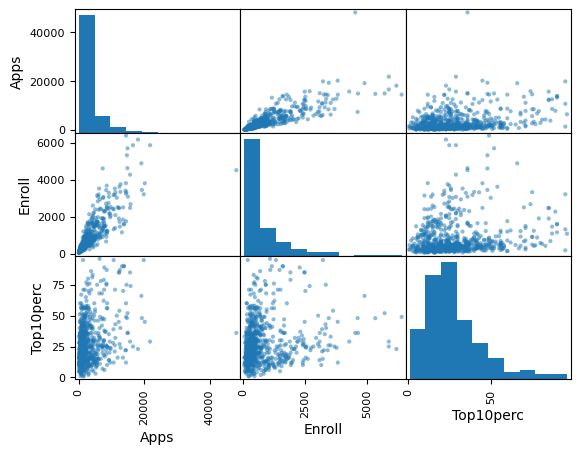

In [18]:
pd.plotting.scatter_matrix(college_df[['Apps', 'Enroll', 'Top10perc']])

<AxesSubplot: title={'center': 'Outstate'}, xlabel='Private'>

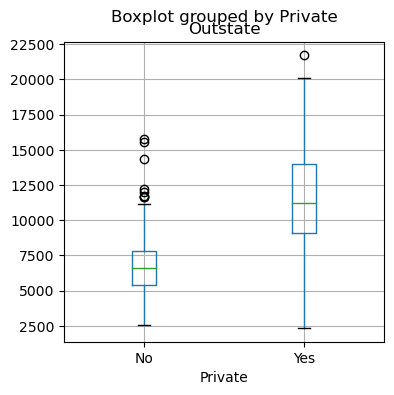

In [21]:
# compare the out of state tuition for private vs non private institutons 
college_df.boxplot(column='Outstate', by='Private', figsize=(4, 4))


Public schools out of state tuition seem to demand much less than their private counter parts. But they have many more outliers, perhaps more prestigious public universities can still demand higher out of state tuition fees. 

The top and bottom whiskers represent the 1.5 * IQR outlier bounds. 

In [26]:
#create a new variable of kids who come from elite high schools
# top 10 percent reveals the percent of students who were in the top 10 % of their class

college_df['elite'] = pd.cut(college_df['Top10perc'],
                             [0,50,100],
                             labels=['No','Yes'])
#0-0.5 is the first bin and then everything above is the second bin

In [35]:
college_df.elite.value_counts()



elite
No     699
Yes     78
Name: count, dtype: int64

In [ ]:
# plot some histograms

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,elite
Private,,,,,,,,,,,,,,,,,,
Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No


array([[<AxesSubplot: title={'center': 'Books'}>,
        <AxesSubplot: title={'center': 'Enroll'}>],
       [<AxesSubplot: title={'center': 'Grad.Rate'}>, <AxesSubplot: >]],
      dtype=object)

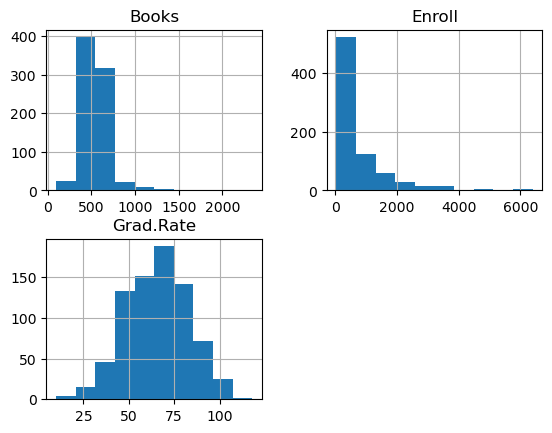

In [41]:
college_df[['Books','Enroll','Grad.Rate']].hist()

---
Auto Dataset

In [42]:
auto_df = load_data('Auto')

In [45]:
print(auto_df.shape)
auto_df.info()

(392, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [46]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [47]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


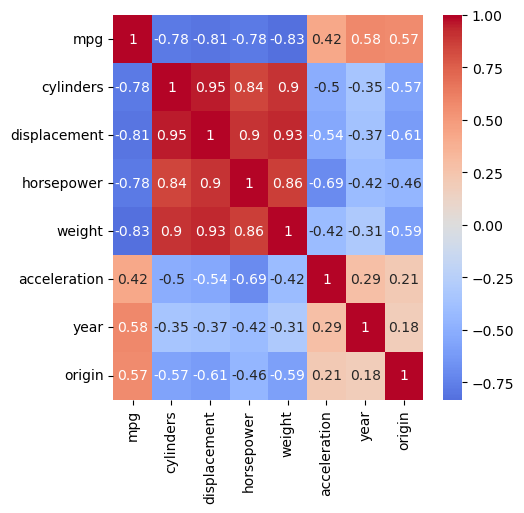

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(auto_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

---

Boston Dataset


In [53]:
boston_df = load_data('Boston')

In [54]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2
